# Inference for Gaussian Graphical Model

In [68]:
# generate covariance
ρ = 0.5
p = 20

function generatePrecision(::Symbol, p, ρ)
    Ω = eye(p)    
    for c=1:p-1        
        Ω[c,c+1] = ρ
        Ω[c+1,c] = ρ    
    end    
    Ω
end

Ω = generatePrecision(:Chain, p, ρ)
X = CovSel.generateData(Ω, n)

2000×20 Array{Float64,2}:
 -0.704831    0.107387   -0.379487   …   4.45238     -4.19457     1.04909  
 -1.39118     0.739981   -0.797548       0.355558     1.05022    -0.0134154
  1.19312     0.251609   -1.62047       -0.276586     1.74057    -0.721197 
 -0.460204    0.0381114   1.23365       -1.38621      1.06785    -2.07464  
 -0.200074   -1.96582     1.94517       -1.87742      1.54263    -1.45996  
  1.15142    -2.04489     1.8912     …  -2.21693      2.25555    -0.125788 
 -1.27977     3.80122    -2.62903        0.691322     0.698772    0.145808 
 -0.148079   -1.41581     0.374883       0.119019    -1.07529     0.639193 
 -0.597483    2.70553    -2.58366       -1.02572     -0.632389   -2.03415  
  0.0250074  -0.549152    0.75502       -0.426431    -0.0302002  -1.42599  
  0.846334   -2.09004     1.15032    …   3.21021     -3.36336     3.54806  
  1.18689    -2.08719     0.0624562      3.4384      -1.78042     1.33948  
  0.983468    1.47947    -1.47521       -0.00956115   0.186434

In [38]:
import CovSel
reload("CovSel")

In [60]:
import ROCKET
reload("ROCKET")

In [74]:
numRep = 2000
n = 2000
res = zeros(numRep)
for rep=1:numRep
    X = CovSel.generateData(Ω, n)
    # eP, eVar = ROCKET._teInferenceGaussian(X, 1, 2, 2)
    eP, eVar = ROCKET._teInferenceGaussian(X, 1, 7, [2,4,5])
    res[rep] = (eP - Ω[1,7]) / sqrt(eVar)
end

In [72]:
import Distributions
import PyPlot

INFO: Installing PyQt5 via Anaconda's /home/mkolar/anaconda/bin/conda...


Fetching package metadata .........
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /home/mkolar/anaconda:
#
pyqt                      4.11.4                   py27_4  


In [95]:
import HD
reload("HD")

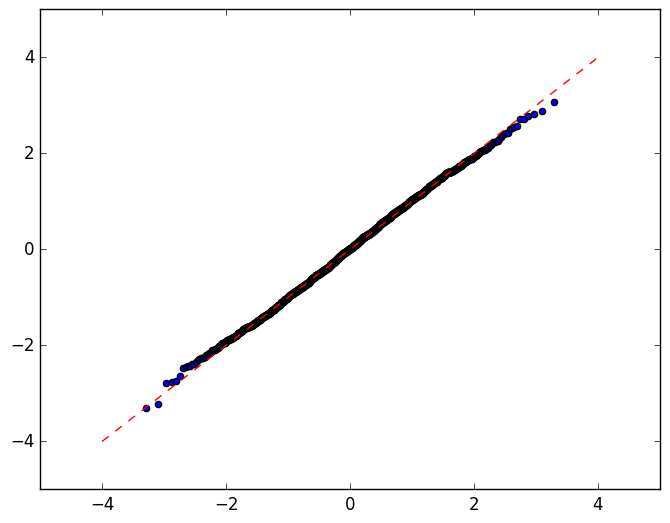

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0ee68c6f90>

In [75]:
qq = Distributions.qqbuild(Distributions.Normal(), res) 
PyPlot.scatter(qq.qx, qq.qy)
PyPlot.plot(-4:0.01:4, -4:0.01:4, linestyle="--", color="red")

In [67]:
Y = X
a = 1
b = 2
n, p = size(Y)
I = setdiff(1:p, [a,b])
λ = sqrt(2. * log(p) )
τ0 = 1e-4
x = view(Y, :, I)
ya = view(Y, :, a)
yb = view(Y, :, b);

LoadError: [91mUndefVarError: X not defined[39m

In [83]:
    scaleX = zeros(p-2)
    ROCKET._stdColumn!(scaleX, x)
    scale!(scaleX, λ)

18-element Array{Float64,1}:
 5.60293
 6.29415
 6.73722
 7.13752
 7.53628
 7.79474
 7.83783
 7.92658
 7.92083
 7.76384
 7.55843
 7.42207
 7.14662
 6.69857
 6.25386
 5.58174
 4.73039
 3.35505

In [84]:

    g = HD.AProxL1(scaleX)

fa = HD.CDSqrtLassoLoss(ya, x)
      fb = HD.CDSqrtLassoLoss(yb, x)
      γa = HD.coordinateDescent(fa, g)
      γb = HD.coordinateDescent(fb, g)

18-element ProximalBase.SparseIterate{Float64} with 1 stored entry:
  [1 ]  =  -0.655211


In [85]:
      Sa = find(x -> abs(x) > τ0, γa)
      Sb = find(x -> abs(x) > τ0, γb)
      ISa = I[Sa]
      ISb = I[Sb]
      S = union(ISa, ISb)

1-element Array{Int64,1}:
 3

In [69]:
@code_warntype ROCKET._teInferenceGaussian(X, 1, 2, [3,4,5])

Variables:
  #self#::ROCKET.#_teInferenceGaussian
  Y::Array{Float64,2}
  a::Int64
  b@_4::Int64
  S::Array{Int64,1}
  n::Int64
  p::Int64
  #temp#@_8::Int64
  x::SubArray{Float64,2,Array{Float64,2},Tuple{Base.Slice{Base.OneTo{Int64}},Array{Int64,1}},false}
  y::SubArray{Float64,2,Array{Float64,2},Tuple{Base.Slice{Base.OneTo{Int64}},Array{Int64,1}},false}
  β::Array{Float64,2}
  ε::Array{Float64,2}
  J@_13::Any
  i@_14::Int64
  #temp#@_15::Int64
  b@_16::Bool
  J@_17::Any
  i@_18::Int64
  #temp#@_19::Int64
  b@_20::Bool
  TS::Any
  shape::Tuple{Base.OneTo{Int64},Base.OneTo{Int64}}
  keeps@_23::Tuple{Tuple{Bool,Bool},Tuple{Bool,Bool}}
  Idefaults@_24::Tuple{Tuple{Int64,Int64},Tuple{Int64,Int64}}
  #temp#@_25::Int64
  iter::CartesianRange{CartesianIndex{2}}
  keeps@_27::Tuple{Tuple{Bool,Bool}}
  Idefaults@_28::Tuple{Tuple{Int64,Int64}}
  #temp#@_29::Int64
  keep@_30::Tuple{Bool,Bool}
  Idefault@_31::Tuple{Int64,Int64}
  #temp#@_32::Int64
  A1::Any
  keeps@_34::Tuple{}
  Idefaults@_35::Tu

In [80]:
@code_warntype ROCKET._teInferenceGaussian(Y, 1, 2, 2, ROCKET.ROCKETOptions())

Variables:
  #self#::ROCKET.#_teInferenceGaussian
  Y::Array{Float64,2}
  a::Int64
  b@_4::Int64
  methodType::Int64
  options::ROCKET.ROCKETOptions
  #6::ROCKET.##6#8
  #7::ROCKET.##7#9
  #temp#@_9::Int64
  n::Int64
  p::Int64
  I::Array{Int64,1}
  λ::Float64
  τ0::Core.Box
  x::SubArray{Float64,2,Array{Float64,2},Tuple{Base.Slice{Base.OneTo{Int64}},Array{Int64,1}},false}
  ya::SubArray{Float64,1,Array{Float64,2},Tuple{Base.Slice{Base.OneTo{Int64}},Int64},true}
  yb::SubArray{Float64,1,Array{Float64,2},Tuple{Base.Slice{Base.OneTo{Int64}},Int64},true}
  scaleX::Array{Float64,1}
  g::ProximalBase.AProxL1{Float64,1}
  γa::ProximalBase.SparseIterate{Float64}
  γb::ProximalBase.SparseIterate{Float64}
  fa::Any
  fb::Any
  Sa::Array{Int64,1}
  Sb::Array{Int64,1}
  S::Array{Int64,1}
  #temp#@_27::Float64
  #temp#@_28::Float64
  #136::Base.##136#137{Int64}
  J@_30::Any
  i@_31::Int64
  #temp#@_32::Int64
  b@_33::Bool
  J@_34::Tuple{Base.Slice{Base.OneTo{Int64}},Int64}
  stride1@_35::Int64
  #